<a href="https://colab.research.google.com/github/withoutsultang/critical-temperature-of-superconductors-RandomForest/blob/main/datascience_randomforestRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터사이언스 기말고사 과제**

#캐글 데이터셋 준비

In [ ]:
!kaggle competitions download -c critical-temperature-of-superconductors

 81% 7.00M/8.64M [00:00<00:00, 73.0MB/s]
100% 8.64M/8.64M [00:00<00:00, 73.8MB/s]


In [ ]:
!unzip critical-temperature-of-superconductors.zip -d ./data

Archive:  critical-temperature-of-superconductors.zip
  inflating: ./data/Samsung_Baseline____.ipynb  
  inflating: ./data/formula_test.csv  
  inflating: ./data/formula_train.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


# 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 읽기
train = pd.read_csv('/content/data/train.csv')
formula_train = pd.read_csv('/content/data/formula_train.csv')

test = pd.read_csv('/content/data/test.csv')
formula_test = pd.read_csv('/content/data/formula_test.csv')


In [ ]:
# train 데이터셋 변수명 매핑
train_columns_mapping = {
    'number_of_elements': '원소 개수',
    'mean_atomic_mass': '평균 원자 질량',
    'wtd_mean_atomic_mass': '가중 평균 원자 질량',
    'gmean_atomic_mass': '기하 평균 원자 질량',
    'wtd_gmean_atomic_mass': '가중 기하 평균 원자 질량',
    'entropy_atomic_mass': '원자 질량 엔트로피',
    'wtd_entropy_atomic_mass': '가중 원자 질량 엔트로피',
    'range_atomic_mass': '원자 질량 범위',
    'wtd_range_atomic_mass': '가중 원자 질량 범위',
    'std_atomic_mass': '원자 질량 표준편차',
    'wtd_std_atomic_mass': '가중 원자 질량 표준편차',
    'mean_fie': '평균 이온화 에너지',
    'wtd_mean_fie': '가중 평균 이온화 에너지',
    'gmean_fie': '기하 평균 이온화 에너지',
    'wtd_gmean_fie': '가중 기하 평균 이온화 에너지',
    'entropy_fie': '이온화 에너지 엔트로피',
    'wtd_entropy_fie': '가중 이온화 에너지 엔트로피',
    'range_fie': '이온화 에너지 범위',
    'wtd_range_fie': '가중 이온화 에너지 범위',
    'std_fie': '이온화 에너지 표준편차',
    'wtd_std_fie': '가중 이온화 에너지 표준편차',
    'mean_atomic_radius': '평균 원자 반경',
    'wtd_mean_atomic_radius': '가중 평균 원자 반경',
    'gmean_atomic_radius': '기하 평균 원자 반경',
    'wtd_gmean_atomic_radius': '가중 기하 평균 원자 반경',
    'entropy_atomic_radius': '원자 반경 엔트로피',
    'wtd_entropy_atomic_radius': '가중 원자 반경 엔트로피',
    'range_atomic_radius': '원자 반경 범위',
    'wtd_range_atomic_radius': '가중 원자 반경 범위',
    'std_atomic_radius': '원자 반경 표준편차',
    'wtd_std_atomic_radius': '가중 원자 반경 표준편차',
    'mean_Density': '평균 밀도',
    'wtd_mean_Density': '가중 평균 밀도',
    'gmean_Density': '기하 평균 밀도',
    'wtd_gmean_Density': '가중 기하 평균 밀도',
    'entropy_Density': '밀도 엔트로피',
    'wtd_entropy_Density': '가중 밀도 엔트로피',
    'range_Density': '밀도 범위',
    'wtd_range_Density': '가중 밀도 범위',
    'std_Density': '밀도 표준편차',
    'wtd_std_Density': '가중 밀도 표준편차',
    'mean_ElectronAffinity': '평균 전자 친화력',
    'wtd_mean_ElectronAffinity': '가중 평균 전자 친화력',
    'gmean_ElectronAffinity': '기하 평균 전자 친화력',
    'wtd_gmean_ElectronAffinity': '가중 기하 평균 전자 친화력',
    'entropy_ElectronAffinity': '전자 친화력 엔트로피',
    'wtd_entropy_ElectronAffinity': '가중 전자 친화력 엔트로피',
    'range_ElectronAffinity': '전자 친화력 범위',
    'wtd_range_ElectronAffinity': '가중 전자 친화력 범위',
    'std_ElectronAffinity': '전자 친화력 표준편차',
    'wtd_std_ElectronAffinity': '가중 전자 친화력 표준편차',
    'mean_FusionHeat': '평균 융해열',
    'wtd_mean_FusionHeat': '가중 평균 융해열',
    'gmean_FusionHeat': '기하 평균 융해열',
    'wtd_gmean_FusionHeat': '가중 기하 평균 융해열',
    'entropy_FusionHeat': '융해열 엔트로피',
    'wtd_entropy_FusionHeat': '가중 융해열 엔트로피',
    'range_FusionHeat': '융해열 범위',
    'wtd_range_FusionHeat': '가중 융해열 범위',
    'std_FusionHeat': '융해열 표준편차',
    'wtd_std_FusionHeat': '가중 융해열 표준편차',
    'mean_ThermalConductivity': '평균 열전도율',
    'wtd_mean_ThermalConductivity': '가중 평균 열전도율',
    'gmean_ThermalConductivity': '기하 평균 열전도율',
    'wtd_gmean_ThermalConductivity': '가중 기하 평균 열전도율',
    'entropy_ThermalConductivity': '열전도율 엔트로피',
    'wtd_entropy_ThermalConductivity': '가중 열전도율 엔트로피',
    'range_ThermalConductivity': '열전도율 범위',
    'wtd_range_ThermalConductivity': '가중 열전도율 범위',
    'std_ThermalConductivity': '열전도율 표준편차',
    'wtd_std_ThermalConductivity': '가중 열전도율 표준편차',
    'mean_Valence': '평균 원자가',
    'wtd_mean_Valence': '가중 평균 원자가',
    'gmean_Valence': '기하 평균 원자가',
    'wtd_gmean_Valence': '가중 기하 평균 원자가',
    'entropy_Valence': '원자가 엔트로피',
    'wtd_entropy_Valence': '가중 원자가 엔트로피',
    'range_Valence': '원자가 범위',
    'wtd_range_Valence': '가중 원자가 범위',
    'std_Valence': '원자가 표준편차',
    'wtd_std_Valence': '가중 원자가 표준편차',
    'critical_temp': '임계 온도'
}

# 데이터프레임의 컬럼명을 변경합니다.
train.rename(columns=train_columns_mapping, inplace=True)

# formula_train 데이터셋 변수명 매핑
formula_columns_mapping = {
    'H': '수소',
    'He': '헬륨',
    'Li': '리튬',
    'Be': '베릴륨',
    'B': '붕소',
    'C': '탄소',
    'N': '질소',
    'O': '산소',
    'F': '플루오린',
    'Ne': '네온',
    'Na': '나트륨',
    'Mg': '마그네슘',
    'Al': '알루미늄',
    'Si': '규소',
    'P': '인',
    'S': '황',
    'Cl': '염소',
    'Ar': '아르곤',
    'K': '칼륨',
    'Ca': '칼슘',
    'Sc': '스칸듐',
    'Ti': '타이타늄',
    'V': '바나듐',
    'Cr': '크롬',
    'Mn': '망가니즈',
    'Fe': '철',
    'Co': '코발트',
    'Ni': '니켈',
    'Cu': '구리',
    'Zn': '아연',
    'Ga': '갈륨',
    'Ge': '저마늄',
    'As': '비소',
    'Se': '셀레늄',
    'Br': '브로민',
    'Kr': '크립톤',
    'Rb': '루비듐',
    'Sr': '스트론튬',
    'Y': '이트륨',
    'Zr': '지르코늄',
    'Nb': '나이오븀',
    'Mo': '몰리브덴',
    'Tc': '테크네튬',
    'Ru': '루테늄',
    'Rh': '로듐',
    'Pd': '팔라듐',
    'Ag': '은',
    'Cd': '카드뮴',
    'In': '인듐',
    'Sn': '주석',
    'Sb': '안티모니',
    'Te': '텔루륨',
    'I': '아이오딘',
    'Xe': '제논',
    'Cs': '세슘',
    'Ba': '바륨',
    'La': '란타넘',
    'Ce': '세륨',
    'Pr': '프라세오디뮴',
    'Nd': '네오디뮴',
    'Pm': '프로메튬',
    'Sm': '사마륨',
    'Eu': '유로퓸',
    'Gd': '가돌리늄',
    'Tb': '터븀',
    'Dy': '디스프로슘',
    'Ho': '홀뮴',
    'Er': '어븀',
    'Tm': '툴륨',
    'Yb': '이터븀',
    'Lu': '루테튬',
    'Hf': '하프늄',
    'Ta': '탄탈럼',
    'W': '텅스텐',
    'Re': '레늄',
    'Os': '오스뮴',
    'Ir': '이리듐',
    'Pt': '백금',
    'Au': '금',
    'Hg': '수은',
    'Tl': '탈륨',
    'Pb': '납',
    'Bi': '비스무트',
    'Po': '폴로늄',
    'At': '아스타틴',
    'Rn': '라돈',
    'critical_temp': '임계 온도',
    'material': '물질'
}

# formula_train 데이터프레임의 컬럼명을 변경합니다.
formula_train.rename(columns=formula_columns_mapping, inplace=True)

In [ ]:
train.head()

,원소 개수,평균 원자 질량,가중 평균 원자 질량,기하 평균 원자 질량,가중 기하 평균 원자 질량,원자 질량 엔트로피,가중 원자 질량 엔트로피,원자 질량 범위,가중 원자 질량 범위,원자 질량 표준편차,...,가중 평균 원자가,기하 평균 원자가,가중 기하 평균 원자가,원자가 엔트로피,가중 원자가 엔트로피,원자가 범위,가중 원자가 범위,원자가 표준편차,가중 원자가 표준편차,임계 온도
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [ ]:
formula_train.head()

,수소,헬륨,리튬,베릴륨,붕소,탄소,질소,산소,플루오린,네온,...,이리듐,백금,금,수은,탈륨,납,비스무트,폴로늄,아스타틴,라돈
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   원소 개수             17010 non-null  int64  
 1   평균 원자 질량          17010 non-null  float64
 2   가중 평균 원자 질량       17010 non-null  float64
 3   기하 평균 원자 질량       17010 non-null  float64
 4   가중 기하 평균 원자 질량    17010 non-null  float64
 5   원자 질량 엔트로피        17010 non-null  float64
 6   가중 원자 질량 엔트로피     17010 non-null  float64
 7   원자 질량 범위          17010 non-null  float64
 8   가중 원자 질량 범위       17010 non-null  float64
 9   원자 질량 표준편차        17010 non-null  float64
 10  가중 원자 질량 표준편차     17010 non-null  float64
 11  평균 이온화 에너지        17010 non-null  float64
 12  가중 평균 이온화 에너지     17010 non-null  float64
 13  기하 평균 이온화 에너지     17010 non-null  float64
 14  가중 기하 평균 이온화 에너지  17010 non-null  float64
 15  이온화 에너지 엔트로피      17010 non-null  float64
 16  가중 이온화 에너지 엔트로피   17010 non-null  float6

In [ ]:
formula_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수소      17010 non-null  float64
 1   헬륨      17010 non-null  int64  
 2   리튬      17010 non-null  float64
 3   베릴륨     17010 non-null  float64
 4   붕소      17010 non-null  float64
 5   탄소      17010 non-null  float64
 6   질소      17010 non-null  float64
 7   산소      17010 non-null  float64
 8   플루오린    17010 non-null  float64
 9   네온      17010 non-null  int64  
 10  나트륨     17010 non-null  float64
 11  마그네슘    17010 non-null  float64
 12  알루미늄    17010 non-null  float64
 13  규소      17010 non-null  float64
 14  인       17010 non-null  float64
 15  황       17010 non-null  float64
 16  염소      17010 non-null  float64
 17  아르곤     17010 non-null  int64  
 18  칼륨      17010 non-null  float64
 19  칼슘      17010 non-null  float64
 20  스칸듐     17010 non-null  float64
 21  타이타늄    17010 non-null  float64
 22

In [ ]:
train.isnull().sum()

,0
원소 개수,0
평균 원자 질량,0
가중 평균 원자 질량,0
기하 평균 원자 질량,0
가중 기하 평균 원자 질량,0
...,...
원자가 범위,0
가중 원자가 범위,0
원자가 표준편차,0
가중 원자가 표준편차,0


In [ ]:
formula_train.isnull().sum()

,0
수소,0
헬륨,0
리튬,0
베릴륨,0
붕소,0
...,...
납,0
비스무트,0
폴로늄,0
아스타틴,0


# 데이터 전처리

In [ ]:
formula_train = formula_train.drop(['critical_temp', 'material'], axis=1)

train_all = pd.concat([train, formula_train], axis=1)

In [ ]:
print(train_all.shape)

(17010, 168)


In [ ]:
print(train_all.describe())

              원소 개수      평균 원자 질량   가중 평균 원자 질량   기하 평균 원자 질량  가중 기하 평균 원자 질량  \
count  17010.000000  17010.000000  17010.000000  17010.000000    17010.000000   
mean       4.113874     87.534919     73.000381     71.308789       58.599393   
std        1.437846     29.786319     33.730910     31.166777       36.902657   
min        1.000000      6.941000      6.423452      5.320573        1.960849   
25%        3.000000     72.383174     52.078254     58.001648       35.228269   
50%        4.000000     84.841880     60.547264     66.361592       39.821155   
75%        5.000000    100.404410     85.982586     78.116681       73.075297   
max        9.000000    208.980400    208.980400    208.980400      208.980400   

         원자 질량 엔트로피  가중 원자 질량 엔트로피      원자 질량 범위   가중 원자 질량 범위    원자 질량 표준편차  \
count  17010.000000   17010.000000  17010.000000  17010.000000  17010.000000   
mean       1.165500       1.063972    115.443468     33.228642     44.320187   
std        0.364607       0.40

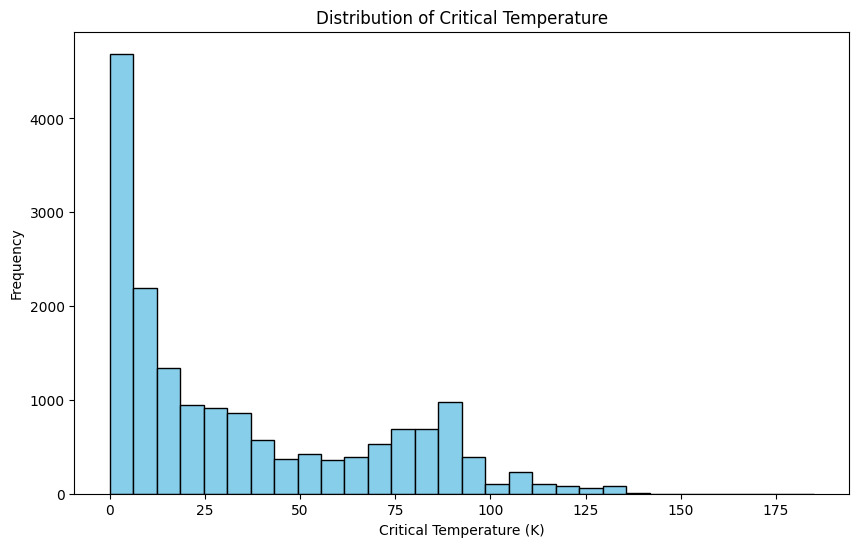

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train_all['critical_temp'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.title('Distribution of Critical Temperature')
plt.show()

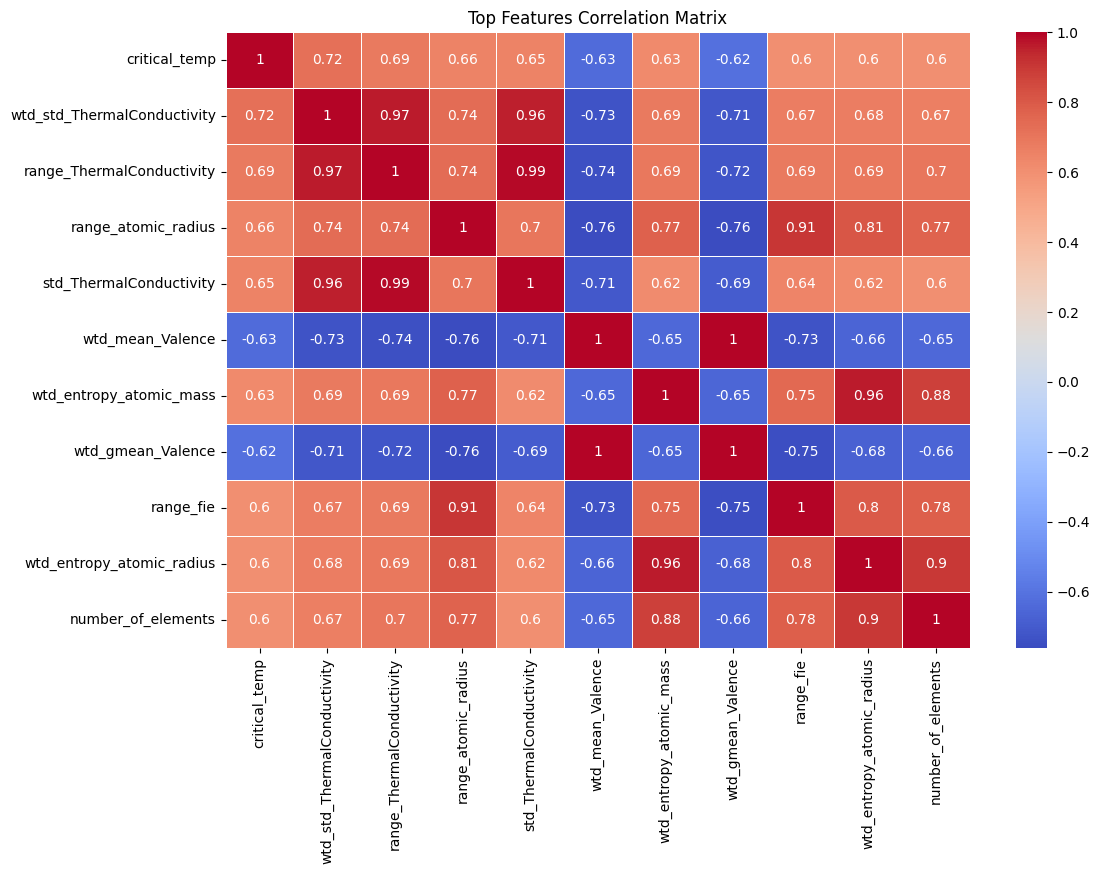

In [ ]:
# 상관 행렬 계산
correlation_matrix = train_all.corr()

# 임계 온도와의 상관계수 추출
target_correlation = correlation_matrix['critical_temp'].abs().sort_values(ascending=False)

# 임계 온도와 상관관계가 높은 상위 10개 변수 선택
top_features = target_correlation.index[:11]  # critical_temp 포함, 상위 10개

# 상위 변수들만 사용한 상관 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(train_all[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top Features Correlation Matrix')
plt.show()


# 모델 학습

In [ ]:
X = train_all.drop('critical_temp', axis=1)
y = train_all['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=12, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 95.31635039895295


In [ ]:
scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
scores = -scores
print("MSE : ", np.round(scores, 4))
print("MSE 평균 : ", np.round(np.mean(scores), 4))

MSE :  [284.9812 287.2422 273.3359 237.7587 174.3854  24.0418  32.232   13.7859
  92.2913 136.526 ]
MSE 평균 :  155.658


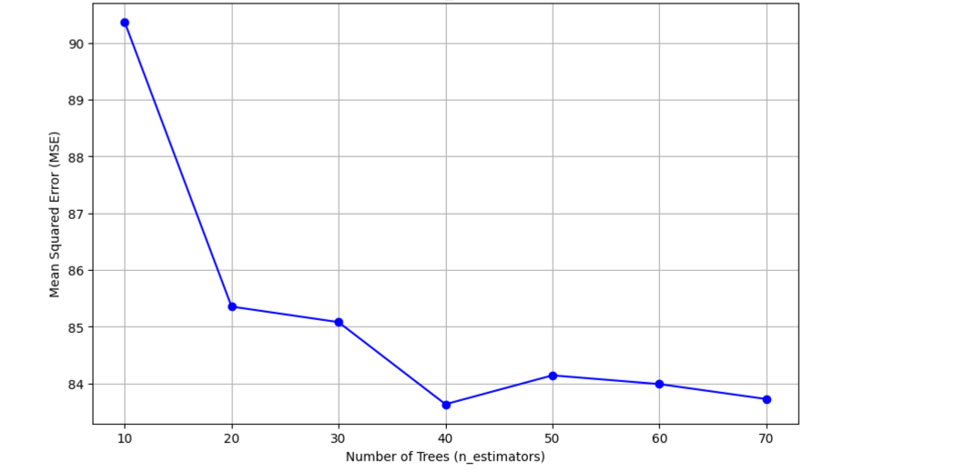

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 n_estimators에 대해 랜덤 포레스트 학습 및 평가
n_estimators_range = [10, 20, 30, 40, 50, 60, 70]
mse_values = []

for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [ ]:
# 하이퍼파라미터 분포 설정
param_distributions = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=5, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터와 최적 모델의 MSE 평가
print("최적의 파라미터: ", random_search.best_params_)
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("최적 모델의 MSE: ", mse)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
최적의 파라미터:  {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
최적 모델의 MSE:  83.94077530894123


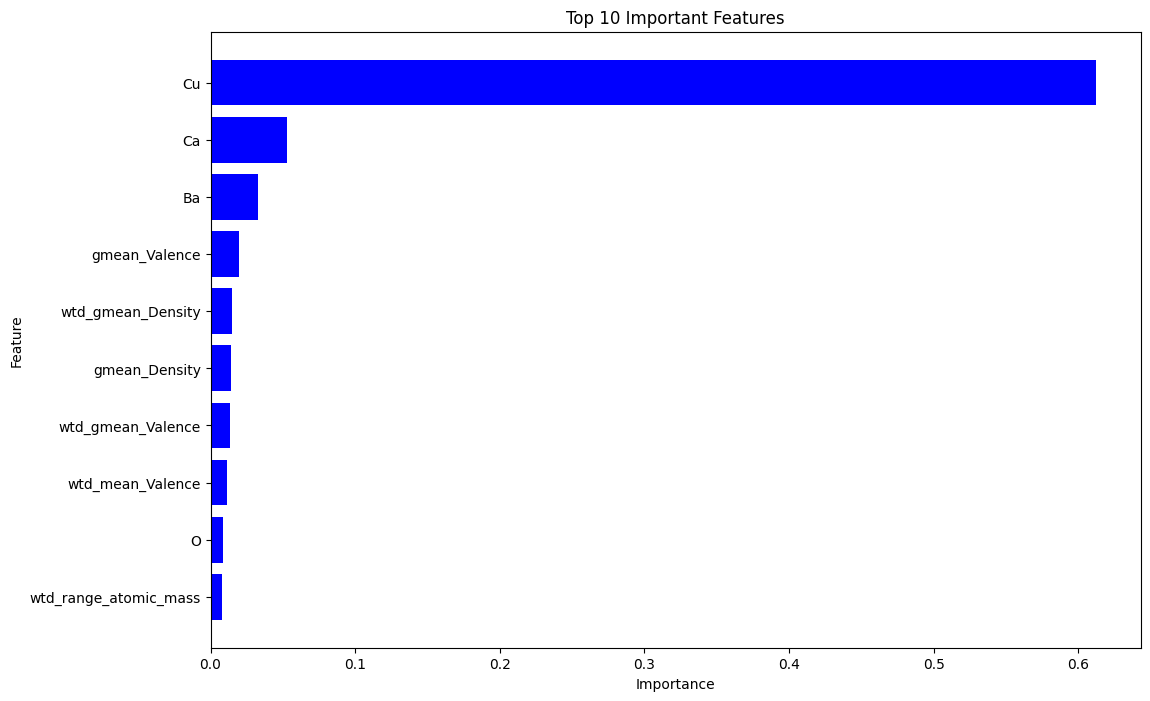

In [ ]:
# 중요 변수 추출
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 변수 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# 'critical_temp' 컬럼 제거 및 데이터 병합
test_all = pd.concat([test, formula_test.drop(['material'], axis=1)], axis=1)
test_predictions = best_rf.predict(test_all)

In [ ]:
submission = pd.DataFrame({'index': range(len(test_predictions)), 'critical_temp': test_predictions})
submission.to_csv('submission.csv', index=False)